In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [319]:
df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Terdapat tujuh variabel numerik : depth, table, price, x, y, z, dan carat
dan 3 variabel kategorikal: cut, color, clarity

In [11]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


variabel x, y, z memiliki nilai min = 0 , ini dihilangkan terlebih dahulu

In [320]:
df = df.drop((df[(df['x']==0)|(df['y']==0)|(df['z']==0)]).index)

In [321]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


#### Melihat Korelasi antar Variabel

In [322]:
df['volume']=(2/3)*df['x']*df['y']*df['z']/2
df

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,12.734010
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,11.501952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,12.692295
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,15.574860
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,17.305750
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,38.640000
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,39.370058
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,38.149909
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,46.922040


In [133]:
from scipy.stats import normaltest
for i in ['carat','depth','table','price','x','y','z','volume']:
    stat,pval = normaltest(df[i])
    if pval <= 0.05:
        print(f' Distribusi {i} tidak normal')
    else:
        print(f'Distribusi {i} normal')
    

 Distribusi carat tidak normal
 Distribusi depth tidak normal
 Distribusi table tidak normal
 Distribusi price tidak normal
 Distribusi x tidak normal
 Distribusi y tidak normal
 Distribusi z tidak normal
 Distribusi volume tidak normal


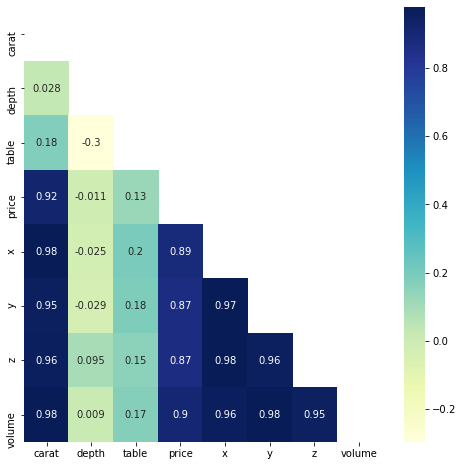

In [134]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',mask=np.triu(df.corr(method='spearman')))
plt.show()

1. carat berkolerasi positif kuat dengan dimensi (x,y,z) dan price
2. price berkolerasi positif kuat dengan dimensi dan carat
3. dimensi berkolerasi positif kuat dengan dimensi lainnya

#### Hubungan Dimensi dan Carat

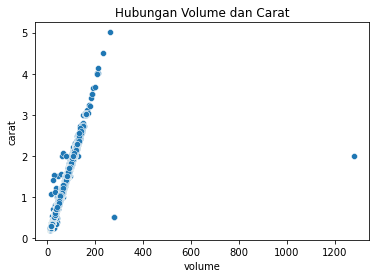

In [135]:
sns.scatterplot(x='volume',y='carat',data=df)
plt.title('Hubungan Volume dan Carat')
plt.show()

In [136]:
df[df['volume']>1200]

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
24067,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06,1280.199353


In [139]:
df[(df['volume']>200)&(df['carat']<1)]

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,279.5008
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,279.5008


#### Hubungan Carat dan Price

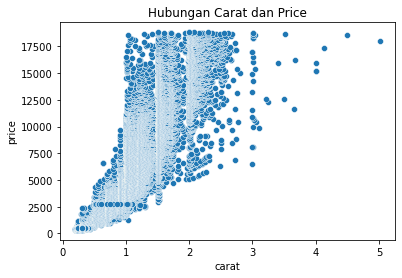

In [82]:
sns.scatterplot(x='carat',y='price',data=df)
plt.title('Hubungan Carat dan Price')
plt.show()

#### Hubungan Dimensi dan Price

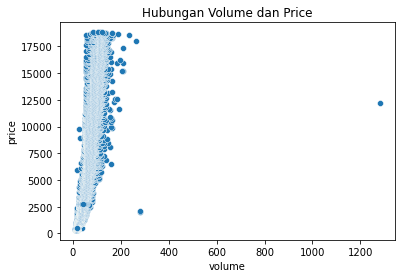

In [112]:
sns.scatterplot(x='volume',y='price',data=df)
plt.title('Hubungan Volume dan Price')
plt.show()

In [137]:
df[df['volume']>1200]

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
24067,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06,1280.199353


In [141]:
df[(df['volume']>200)&(df['price']<2500)]

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,279.5008
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,279.5008


#### Hubungan Panjang, Lebar, dan Tinggi

#### Hubungan Dimensi dan Price

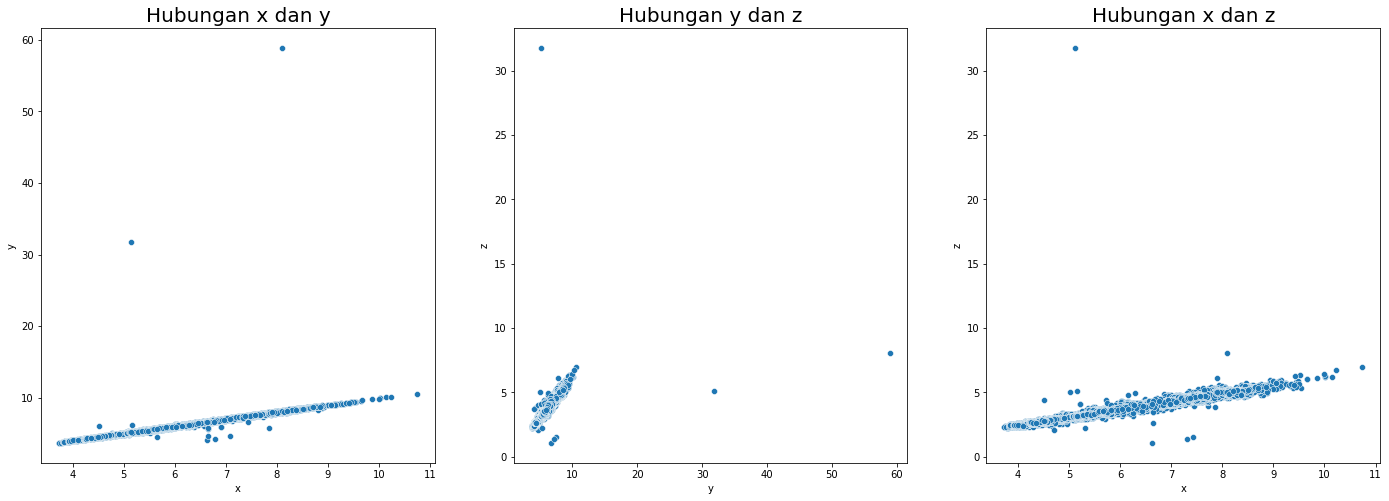

In [267]:
plt.figure(figsize=(24,8))
for i,j,k in zip(['x','y','x'],['y','z','z'],[1,2,3]):
        plt.subplot(1,3,k)
        sns.scatterplot(x=i,y=j,data=df)
        plt.title(f'Hubungan {i} dan {j}',size=20)
plt.show()

In [142]:
df[df['y']>30]

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06,1280.199353
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12,279.500800


In [143]:
df[df['z']>30]

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8,279.5008


In [328]:
df = df.drop((df[(df['z']>30)|(df['y']>30)]).index)

### Pengaruh Variabel Cut

Quality in increasing order Fair, Good, Very Good, Premium, Ideal 

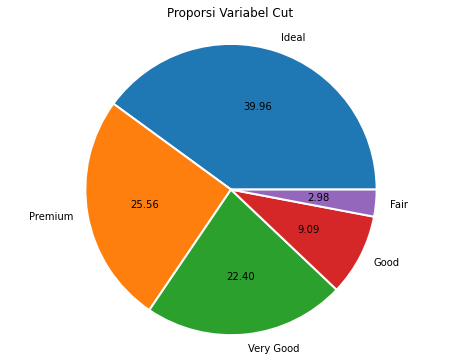

In [329]:
plt.figure(figsize=(8,6))
plt.pie(df['cut'].value_counts(), labels=df['cut'].value_counts().index,
       autopct='%.2f',
       wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
plt.title('Proporsi Variabel Cut',pad=10)
plt.axis('equal')
plt.show()

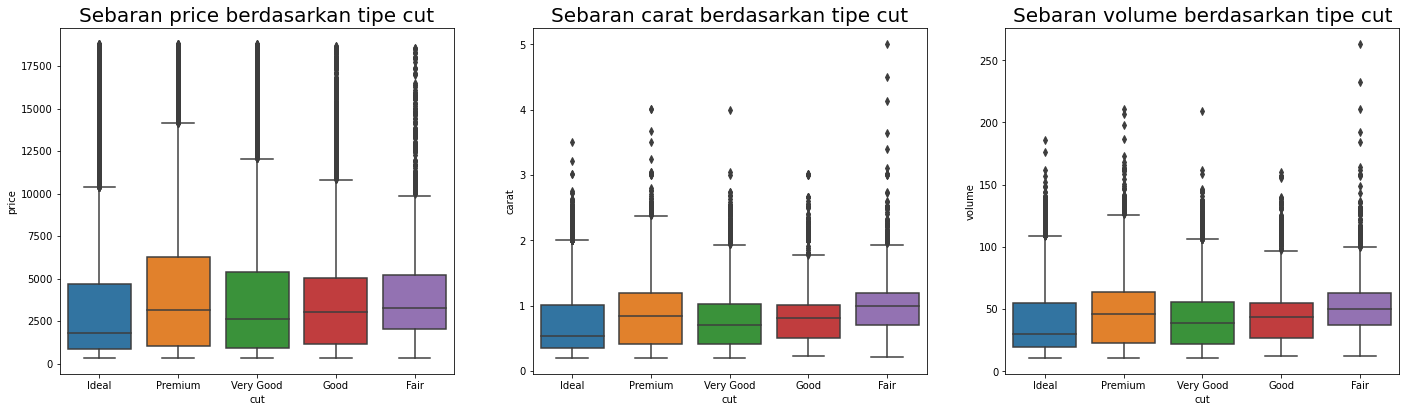

In [331]:
plt.figure(figsize=(24,14))

for i,j in enumerate(['price','carat','volume']):
    plt.subplot(2,3,i+1)
    sns.boxplot(x='cut',y=j,data=df)
    plt.title(f'Sebaran {j} berdasarkan tipe cut',size=20)
    
plt.show()

In [332]:
df['price normalized'] = df['price']/(df['carat']*df['volume'])

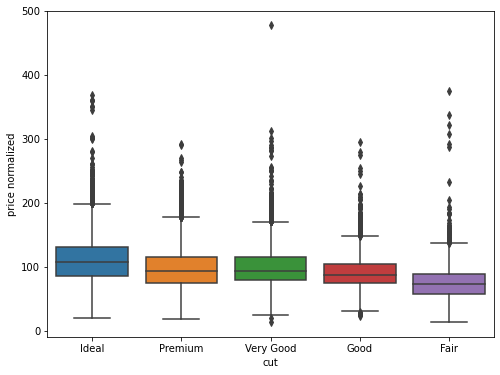

In [352]:
plt.figure(figsize=(8,6))
sns.boxplot(x='cut',y='price normalized',data=df)
plt.show()

In [337]:
from scipy.stats import kruskal

for j in ['price','carat','volume','price normalized']:
    stats,pval = kruskal(*[df[df['cut'] == i][j] for i in df['cut'].value_counts().index.tolist()])
    if pval <= 0.05:
        print(f'Terdapat perbedaan median {j} antar kelompok pada kategori cut')
    else:
        print(f'Tidak terdapat perbedaan median {j} antar kelompok pada kategori cut')


Terdapat perbedaan median price antar kelompok pada kategori cut
Terdapat perbedaan median carat antar kelompok pada kategori cut
Terdapat perbedaan median volume antar kelompok pada kategori cut
Terdapat perbedaan median price normalized antar kelompok pada kategori cut


### Pengaruh Variabel Color

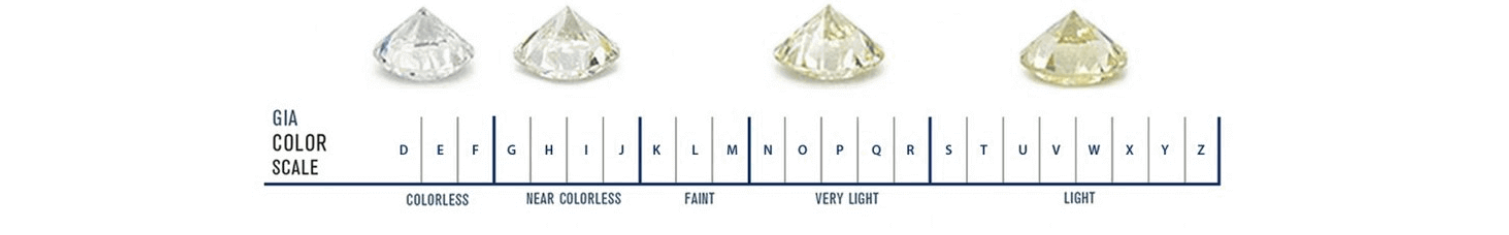

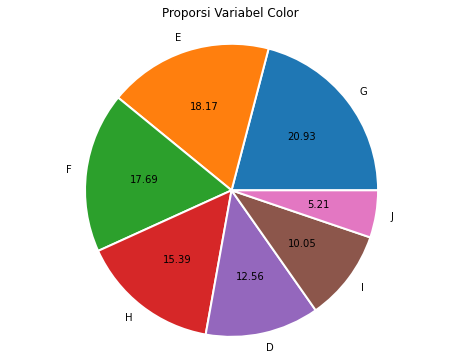

In [338]:
plt.figure(figsize=(8,6))
plt.pie(df['color'].value_counts(), labels=df['color'].value_counts().index,
       autopct='%.2f',
       wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
plt.title('Proporsi Variabel Color',pad=10)
plt.axis('equal')
plt.show()

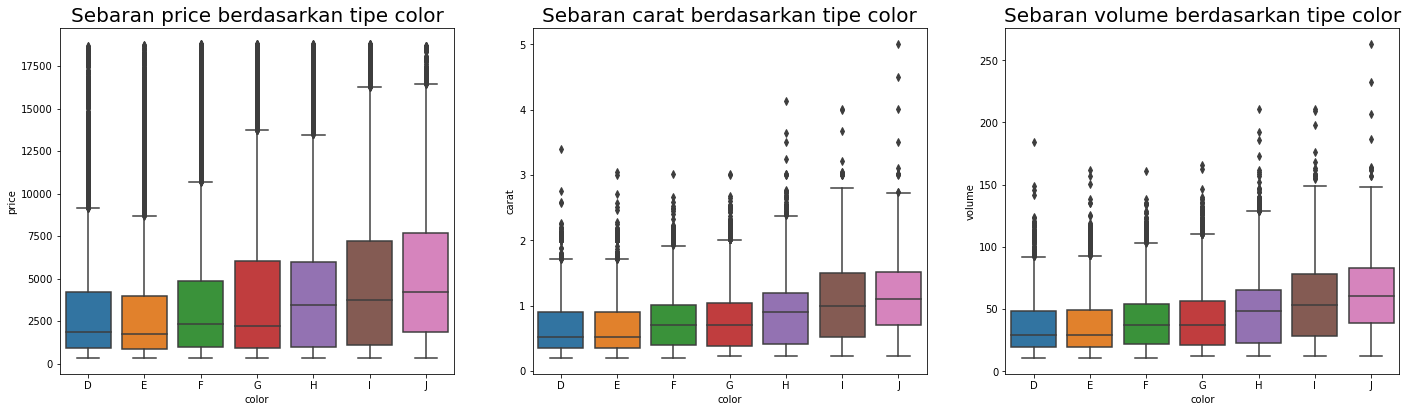

In [339]:
plt.figure(figsize=(24,14))

for i,j in enumerate(['price','carat','volume']):
    plt.subplot(2,3,i+1)
    sns.boxplot(x='color',y=j,data=df)
    plt.title(f'Sebaran {j} berdasarkan tipe color',size=20)
    
plt.show()

<AxesSubplot:xlabel='color', ylabel='price normalized'>

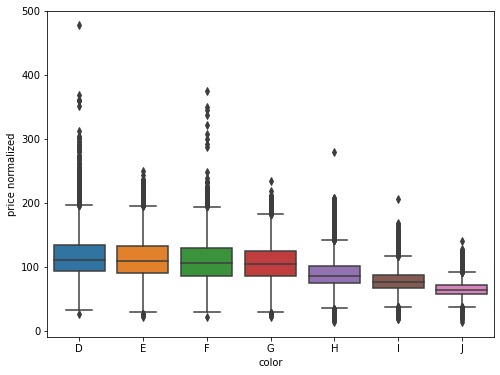

In [351]:
plt.figure(figsize=(8,6))
sns.boxplot(x='color',y='price normalized',data=df)
plt.show()

In [341]:
for j in ['price','carat','volume','price normalized']:
    stats,pval = kruskal(*[df[df['color'] == i][j] for i in df['color'].value_counts().index.tolist()])
    if pval <= 0.05:
        print(f'Terdapat perbedaan median {j} antar kelompok pada kategori color')
    else:
        print(f'Tidak terdapat perbedaan median {j} antar kelompok pada kategori color')


Terdapat perbedaan median price antar kelompok pada kategori color
Terdapat perbedaan median carat antar kelompok pada kategori color
Terdapat perbedaan median volume antar kelompok pada kategori color
Terdapat perbedaan median price normalized antar kelompok pada kategori color


### Pengaruh Variabel Clarity

(In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

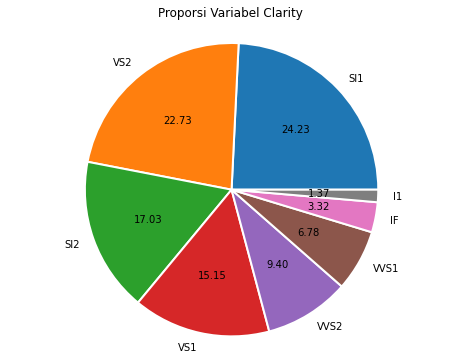

In [342]:
plt.figure(figsize=(8,6))
plt.pie(df['clarity'].value_counts(), labels=df['clarity'].value_counts().index,
       autopct='%.2f',
       wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
plt.title('Proporsi Variabel Clarity',pad=10)
plt.axis('equal')
plt.show()

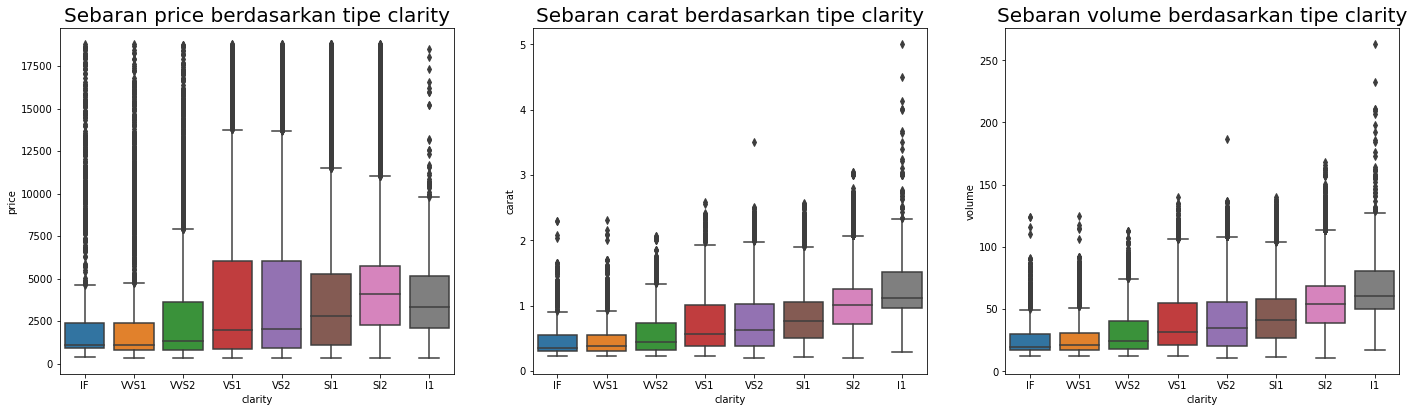

In [343]:
plt.figure(figsize=(24,14))

for i,j in enumerate(['price','carat','volume']):
    plt.subplot(2,3,i+1)
    sns.boxplot(x='clarity',y=j,data=df)
    plt.title(f'Sebaran {j} berdasarkan tipe clarity',size=20)
    
plt.show()

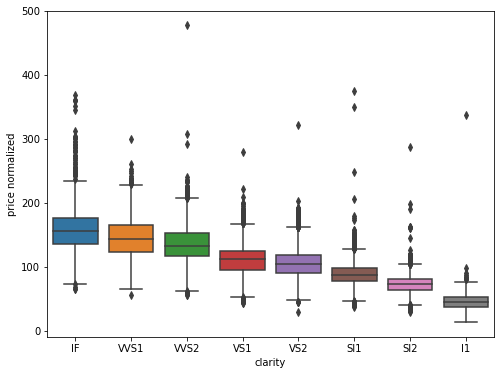

In [353]:
plt.figure(figsize=(8,6))
sns.boxplot(x='clarity',y='price normalized',data=df)
plt.show()

In [372]:
pd.options.display.max_columns = None

In [490]:
df_med = (df.groupby(['cut','color','clarity'])[['price normalized']].mean())
df1 = pd.crosstab([df['cut'],df['color']],df['clarity']).transpose().astype('float')
for i in range(35):
    for j in range(8):
        df1.iloc[j,i]=df_med.iloc[(8*i)+j].values.round(2)
df1

cut       Ideal                                                Premium  \
color         D       E       F       G       H       I      J       D   
clarity                                                                  
IF       271.11  194.74  176.58  155.02  136.92  113.87  93.18  250.23   
VVS1     190.13  170.55  159.51  140.55  124.16  101.29  85.41  176.45   
VVS2     163.69  152.39  141.98  129.26  116.24   96.86  77.03  160.33   
VS1      135.76  129.88  122.54  116.00  104.32   89.01  71.96  134.51   
VS2      132.69  122.84  116.77  105.05   93.19   80.75  68.06  130.98   
SI1      107.04   98.98   93.70   89.39   82.78   75.21  63.77  105.32   
SI2       86.85   81.24   77.30   74.08   69.83   61.89  57.77   82.64   
I1        62.85   61.32   56.44   53.14   47.02   44.69  41.18   54.05   

cut                                                    Very Good          \
color         E       F       G       H       I      J         D       E   
clarity                                                                    
IF       188.90  177.55  157.60  150.87  118.45  88.09    252.66  176.91   
VVS1     173.03  158.71  152.79  139.16  109.90  81.26    166.62  160.96   
VVS2     161.94  140.92  133.64  121.74  101.68  70.77    159.44  151.49   
VS1      129.10  120.18  116.67  100.66   86.20  71.89    126.15  119.83   
VS2      122.09  115.58  103.92   89.59   75.45  64.42    116.87  112.05   
SI1       98.57   91.25   86.21   79.47   71.22  60.33    100.88   95.38   
SI2       78.39   73.93   70.55   64.97   59.75  53.69     81.97   78.27   
I1        54.59   49.42   44.14   41.09   36.79  34.35     54.44   52.90   

cut                                               Good                  \
color         F       G       H       I      J       D       E       F   
clarity                                                                  
IF       163.91  146.29  125.23  107.67  91.79  244.53  161.69  153.75   
VVS1     154.36  138.45  122.66   98.73  83.20  160.58  149.00  143.99   
VVS2     145.58  124.55  110.16   92.72  80.58  149.31  147.01  130.54   
VS1      116.90  110.23   97.61   84.26  72.97  122.16  119.32  109.81   
VS2      108.33  100.79   89.48   77.84  65.36  112.13  108.04  105.56   
SI1       88.95   84.73   80.28   72.41  63.21   97.29   92.44   87.54   
SI2       75.51   72.08   67.99   62.96  57.13   79.37   76.58   73.76   
I1        53.44   45.51   39.27   38.39  38.25   56.84   47.34   47.13   

cut                                       Fair                                 \
color         G       H       I      J       D       E       F       G      H   
clarity                                                                         
IF       146.22  104.43  108.87  93.85  199.45     NaN  136.32  130.73    NaN   
VVS1     135.49  122.26   97.55  86.92  159.77  159.28  141.90  125.86  92.03   
VVS2     130.07  110.67   87.78  75.88  154.68  133.85  161.60  114.72  94.87   
VS1      109.50   95.73   83.65  70.75  116.03  119.89  105.01   96.97  82.91   
VS2       98.66   87.67   74.03  64.80  106.02  105.00  105.46   93.54  79.78   
SI1       83.03   79.75   70.99  60.36   89.38   86.39   86.66   76.19  72.63   
SI2       68.67   67.60   57.86  54.54   74.68   70.87   69.61   62.08  57.44   
I1        42.16   45.93   39.86  37.62   42.08   43.11   48.85   38.37  35.61   

cut                     
color         I      J  
clarity                 
IF          NaN    NaN  
VVS1     100.23  64.94  
VVS2      77.63  55.11  
VS1       72.32  63.85  
VS2       69.94  63.29  
SI1       64.63  57.76  
SI2       53.06  51.35  
I1        37.31  30.23

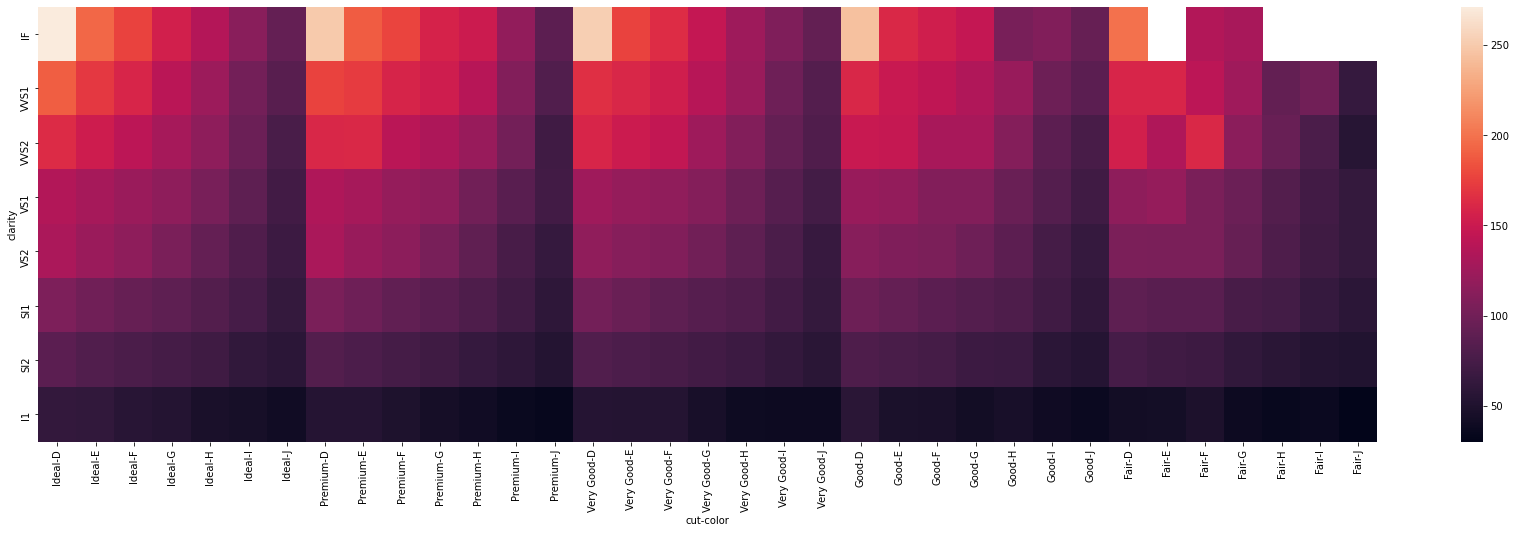

In [491]:
plt.figure(figsize=(30,8))
sns.heatmap(df1)
plt.show()

In [493]:
df_med.sort_values(by='price normalized',ascending=False).head()

,,,price normalized
cut,color,clarity,
Ideal,D,IF,271.110019
Very Good,D,IF,252.664172
Premium,D,IF,250.230579
Good,D,IF,244.534622
Fair,D,IF,199.454209


### Hubungan antar Variabel Kategorikal

In [266]:
from scipy.stats import chi2_contingency

for i,j in zip(['cut','clarity','color'],['color','cut','clarity']):
    stats,p,dof,expected = chi2_contingency(pd.crosstab(df[i],df[j]))
    if p<0.05:
        print(f'variabel {i} dan {j} saling berhubungan')
    else:
        print(f'variabel {i} dan {j}  tidak saling berhubungan')


variabel cut dan color saling berhubungan
variabel clarity dan cut saling berhubungan
variabel color dan clarity saling berhubungan


### Kesimpulan

1. Price berkolerasi kuat secara berturut-turut dengan carat dan volume
2. Terdapat 3 outlier yang sangat jauh pada variabel dimensi y dan z
3. Peningkatan kualitas potongan berkolerasi dengan peningkatan harga
4. Warna yang semakin bening berkolerasi dengan peningkatan harga
5. Peningkatan kesempurnaan dari kecacatan berkolerasi dengan peningkatan harga
6. Variabel cut, color, dan clarity saling bergantung satu sama lainnya